In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
red = "#ae1a1fff"
red_helper_1 = "#cc4125ff"
red_helper_2 = "#6e1517ff"
yellow = "#e69138ff"
blue = "#3c78d8ff"
grey = "#999999ff"
green = "#00a67eff"
brown = "#b85c00ff"

In [3]:
# Recreate the DataFrame
data = np.array([
       [ 0.    ,  0.    ,  0.    , 0.6873 , 0.4653 ],
       [ 0.    ,  0.    ,  1.    , 0.6841 , 0.4653 ],
       [ 0.    ,  0.    ,  3.    , 0.7387 , 0.6252 ],
       [ 0.    ,  1.    ,  0.    , 0.6785 , 0.4653 ], 
       [ 0.    ,  1.    ,  1.    , 0.7078 , 0.5283 ],
       [ 0.    ,  1.    ,  3.    , 0.7609 , 0.6527 ], 
       [ 0.    ,  3.    ,  0.    , 0.7181 , 0.5242 ], 
       [ 0.    ,  3.    ,  1.    , 0.7173 , 0.523 ],    
       [ 0.    ,  3.    ,  3.    , 0.7641 , 0.6486 ],
       [ 1.    ,  0.    ,  0.    , 0.5337 , 0.4354 ], 
       [ 1.    ,  0.    ,  1.    , 0.5439 , 0.4394 ], 
       [ 1.    ,  0.    ,  3.    , 0.7403 , 0.63 ],
       [ 1.    ,  1.    ,  0.    , 0.5463 , 0.4394 ], 
       [ 1.    ,  1.    ,  1.    , 0.6936 , 0.5347 ], 
       [ 1.    ,  1.    ,  3.    , 0.7712 , 0.6575 ],
       [ 1.    ,  3.    ,  0.    , 0.6896 , 0.5307 ],  
       [ 1.    ,  3.    ,  1.    , 0.6833 , 0.5299 ],
       [ 1.    ,  3.    ,  3.    , 0.7641 , 0.6640 ], 
       [ 1.    ,  3.    ,  5.    , 0.7751 , 0.6858 ],  
       [ 1.    ,  3.    , 10.    , 0.7941 , 0.7092 ], 
       [ 1.    ,  3.    , 20.    , 0.7569 , 0.6519 ],
       [ 1.    ,  5.    ,  0.    , 0.6880 , 0.5323 ], 
       [ 1.    ,  5.    ,  5.    , 0.7775 , 0.6866 ],  
       [ 1.    ,  5.    , 10.    , 0.7878 , 0.697 ], 
       [ 1.    , 10.    ,  0.    , 0.6865 , 0.5468 ],
       [ 1.    , 10.    , 10.    , 0.7886 , 0.7108 ],
       [ 3.    ,  0.    ,  0.    , 0.5669 , 0.4225 ], 
       [ 3.    ,  1.    ,  0.    , 0.6372 , 0.4821 ], 
       [ 3.    ,  3.    ,  0.    , 0.7055 , 0.546 ],
       [ 3.    ,  3.    ,  3.    , 0.7633 , 0.6664 ], 
       [ 3.    ,  3.    ,  5.    , 0.7815 , 0.6769 ],
       [ 3.    ,  3.    , 10.    , 0.791  , 0.6898 ],  
       [ 3.    ,  5.    ,  0.    , 0.6904 , 0.5468 ],
       [ 3.    ,  5.    ,  5.    , 0.7775 , 0.6858 ], 
       [ 3.    , 10.    ,  0.    , 0.6912 , 0.5517 ], 
       [ 3.    , 10.    , 10.    , 0.7894 , 0.6906 ],            
       [ 5.    ,  0.    ,  0.    , 0.635  , 0.4984 ],
       [ 5.    ,  3.    ,  0.    , 0.6809 , 0.5380 ],
       [ 5.    ,  3.    ,  3.    , 0.7680 , 0.6664 ], 
       [ 5.    ,  5.    ,  0.    , 0.6785 , 0.5404 ], 
       [ 5.    ,  5.    ,  5.    , 0.7799 , 0.6842 ],  
       [ 5.    , 10.    ,  0.    , 0.6912 , 0.5363 ],  
       [ 5.    , 10.    , 10.    , 0.7910 , 0.7068 ],
])

df = pd.DataFrame(data, columns=["Stage 1", "Stage 2", "Stage 3", "GPT", "Claude"])

df[~df["GPT"].isna()]
df['Stage 1'] = df['Stage 1'].astype(int)
df['Stage 2'] = df['Stage 2'].astype(int)
df['Stage 3'] = df['Stage 3'].astype(int)

In [4]:
def plot_gpt_trends(df, var_stage, facet_stages):
    """
    Plots GPT performance trends for a given var_stage and faceted by the other two stages.

    Args:
    df (pd.DataFrame): DataFrame containing the stages and GPT performance.
    var_stage (str): The stage to use on the x-axis (e.g., "Stage 3").
    facet_stages (list): The stages to use for faceting (e.g., ["Stage 1", "Stage 2"]).
    """
    # Extract the unique values for the faceting stages (x and y grid) and the variable stage (inside the plot)
    var_values = selection[var_stage]  # Values for the x-axis within each plot
    x_values = selection[facet_stages[0]]  # Values for the columns of the subplot grid (x-axis of grid)
    y_values = selection[facet_stages[1]][::-1]  # Values for the rows of the subplot grid (y-axis of grid)

    # Create the plot grid
    fig, axs = plt.subplots(len(y_values), len(x_values), figsize=(16, 16), sharex=False, sharey=False)
    fig.suptitle(f"GPT Synthetic Trends Over {var_stage} by {facet_stages[0]} and {facet_stages[1]}", y=1, weight='bold')

    # Iterate over the unique values of the two facet stages
    for i, y in enumerate(y_values):
        for j, x in enumerate(x_values):
            subset = df[(df[facet_stages[0]] == x) & (df[facet_stages[1]] == y)].sort_values([var_stage])
            axs[i, j].plot(subset[var_stage], subset['GPT'], marker='o', color="#e06666ff", linewidth=3)

            if i == len(y_values) - 1:
                axs[i, j].set_xlabel(var_stage, weight='bold')
            if j == 0:
                axs[i, j].set_ylabel("GPT-Synth Performance", weight='bold')

            axs[i, j].set_xticks([3, 5, 10])
            axs[i, j].set_xlim([1, max(var_values) + 1.5])
            axs[i, j].set_ylim([0.6, 1])

            # Add labels above each data point (GPT performance)
            for index, row in subset.iterrows():
                performance = f"{np.round(row['GPT'], 4)}"
                axs[i, j].annotate(performance, 
                                   (row[var_stage], row['GPT']),  # Position of the point
                                   textcoords="offset points",  # Offset the text a little from the point
                                   xytext=(0, 7),  # Offset of 5 points vertically
                                   ha='center', fontsize=12, weight='bold')

                # Add Stage labels below the point
                label = f"({int(row['Stage 1'])}, {int(row['Stage 2'])}, {int(row['Stage 3'])})"
                axs[i, j].annotate(label, 
                                   (row[var_stage], row['GPT']),  # Position of the point
                                   textcoords="offset points",  # Offset the text a little from the point
                                   xytext=(0, -15),  # Offset of 5 points vertically
                                   ha='center', fontsize=12, weight='bold')

            # Set grid and tick parameters
            # Make the ticks and the outer edges of the plot thicker
            axs[i, j].tick_params(axis='both', which='both', width=2)
            axs[i, j].spines['top'].set_linewidth(2)
            axs[i, j].spines['right'].set_linewidth(2)
            axs[i, j].spines['left'].set_linewidth(2)
            axs[i, j].spines['bottom'].set_linewidth(2)

    # Add Stage 3 labels on the right side
    for i, y in enumerate(y_values):
        fig.text(1.0,
                 0.82 - i * (1 / len(y_values)),
                 f"{facet_stages[1]} = {y}",
                 va='center',
                 ha='left',
                 fontsize=12,
                 rotation='vertical',
                 weight='bold')
    
    # Add Stage 2 labels at the top
    for j, x in enumerate(x_values):
        fig.text(0.19 + j * (1 / len(x_values)),
                 0.975, f"{facet_stages[0]} = {x}",
                 va='center', ha='center',
                 fontsize=12, weight='bold')
    
    fig.tight_layout()

# selection = {"Stage 1": [1, 3, 5],
#              "Stage 2": [3, 5, 10],
#              "Stage 3": [3, 5, 10]}

# extended_stages_df = df.copy()

# extended_stages_df = extended_stages_df[extended_stages_df["Stage 1"].isin(selection["Stage 1"])]
# extended_stages_df = extended_stages_df[extended_stages_df["Stage 2"].isin(selection["Stage 2"])]
# extended_stages_df = extended_stages_df[extended_stages_df["Stage 3"].isin(selection["Stage 3"])]

# plot_gpt_trends(extended_stages_df, "Stage 3", ["Stage 2", "Stage 1"])

In [5]:
# Define the new color palette
colors = ["#999999ff",
           "#b85c00ff", 
          "#00a67eff",
          "#e69138ff", 
          "#3c78d8ff",
          "#cc4125ff", 
         "#6e1517ff",
            "#ae1a1fff"]

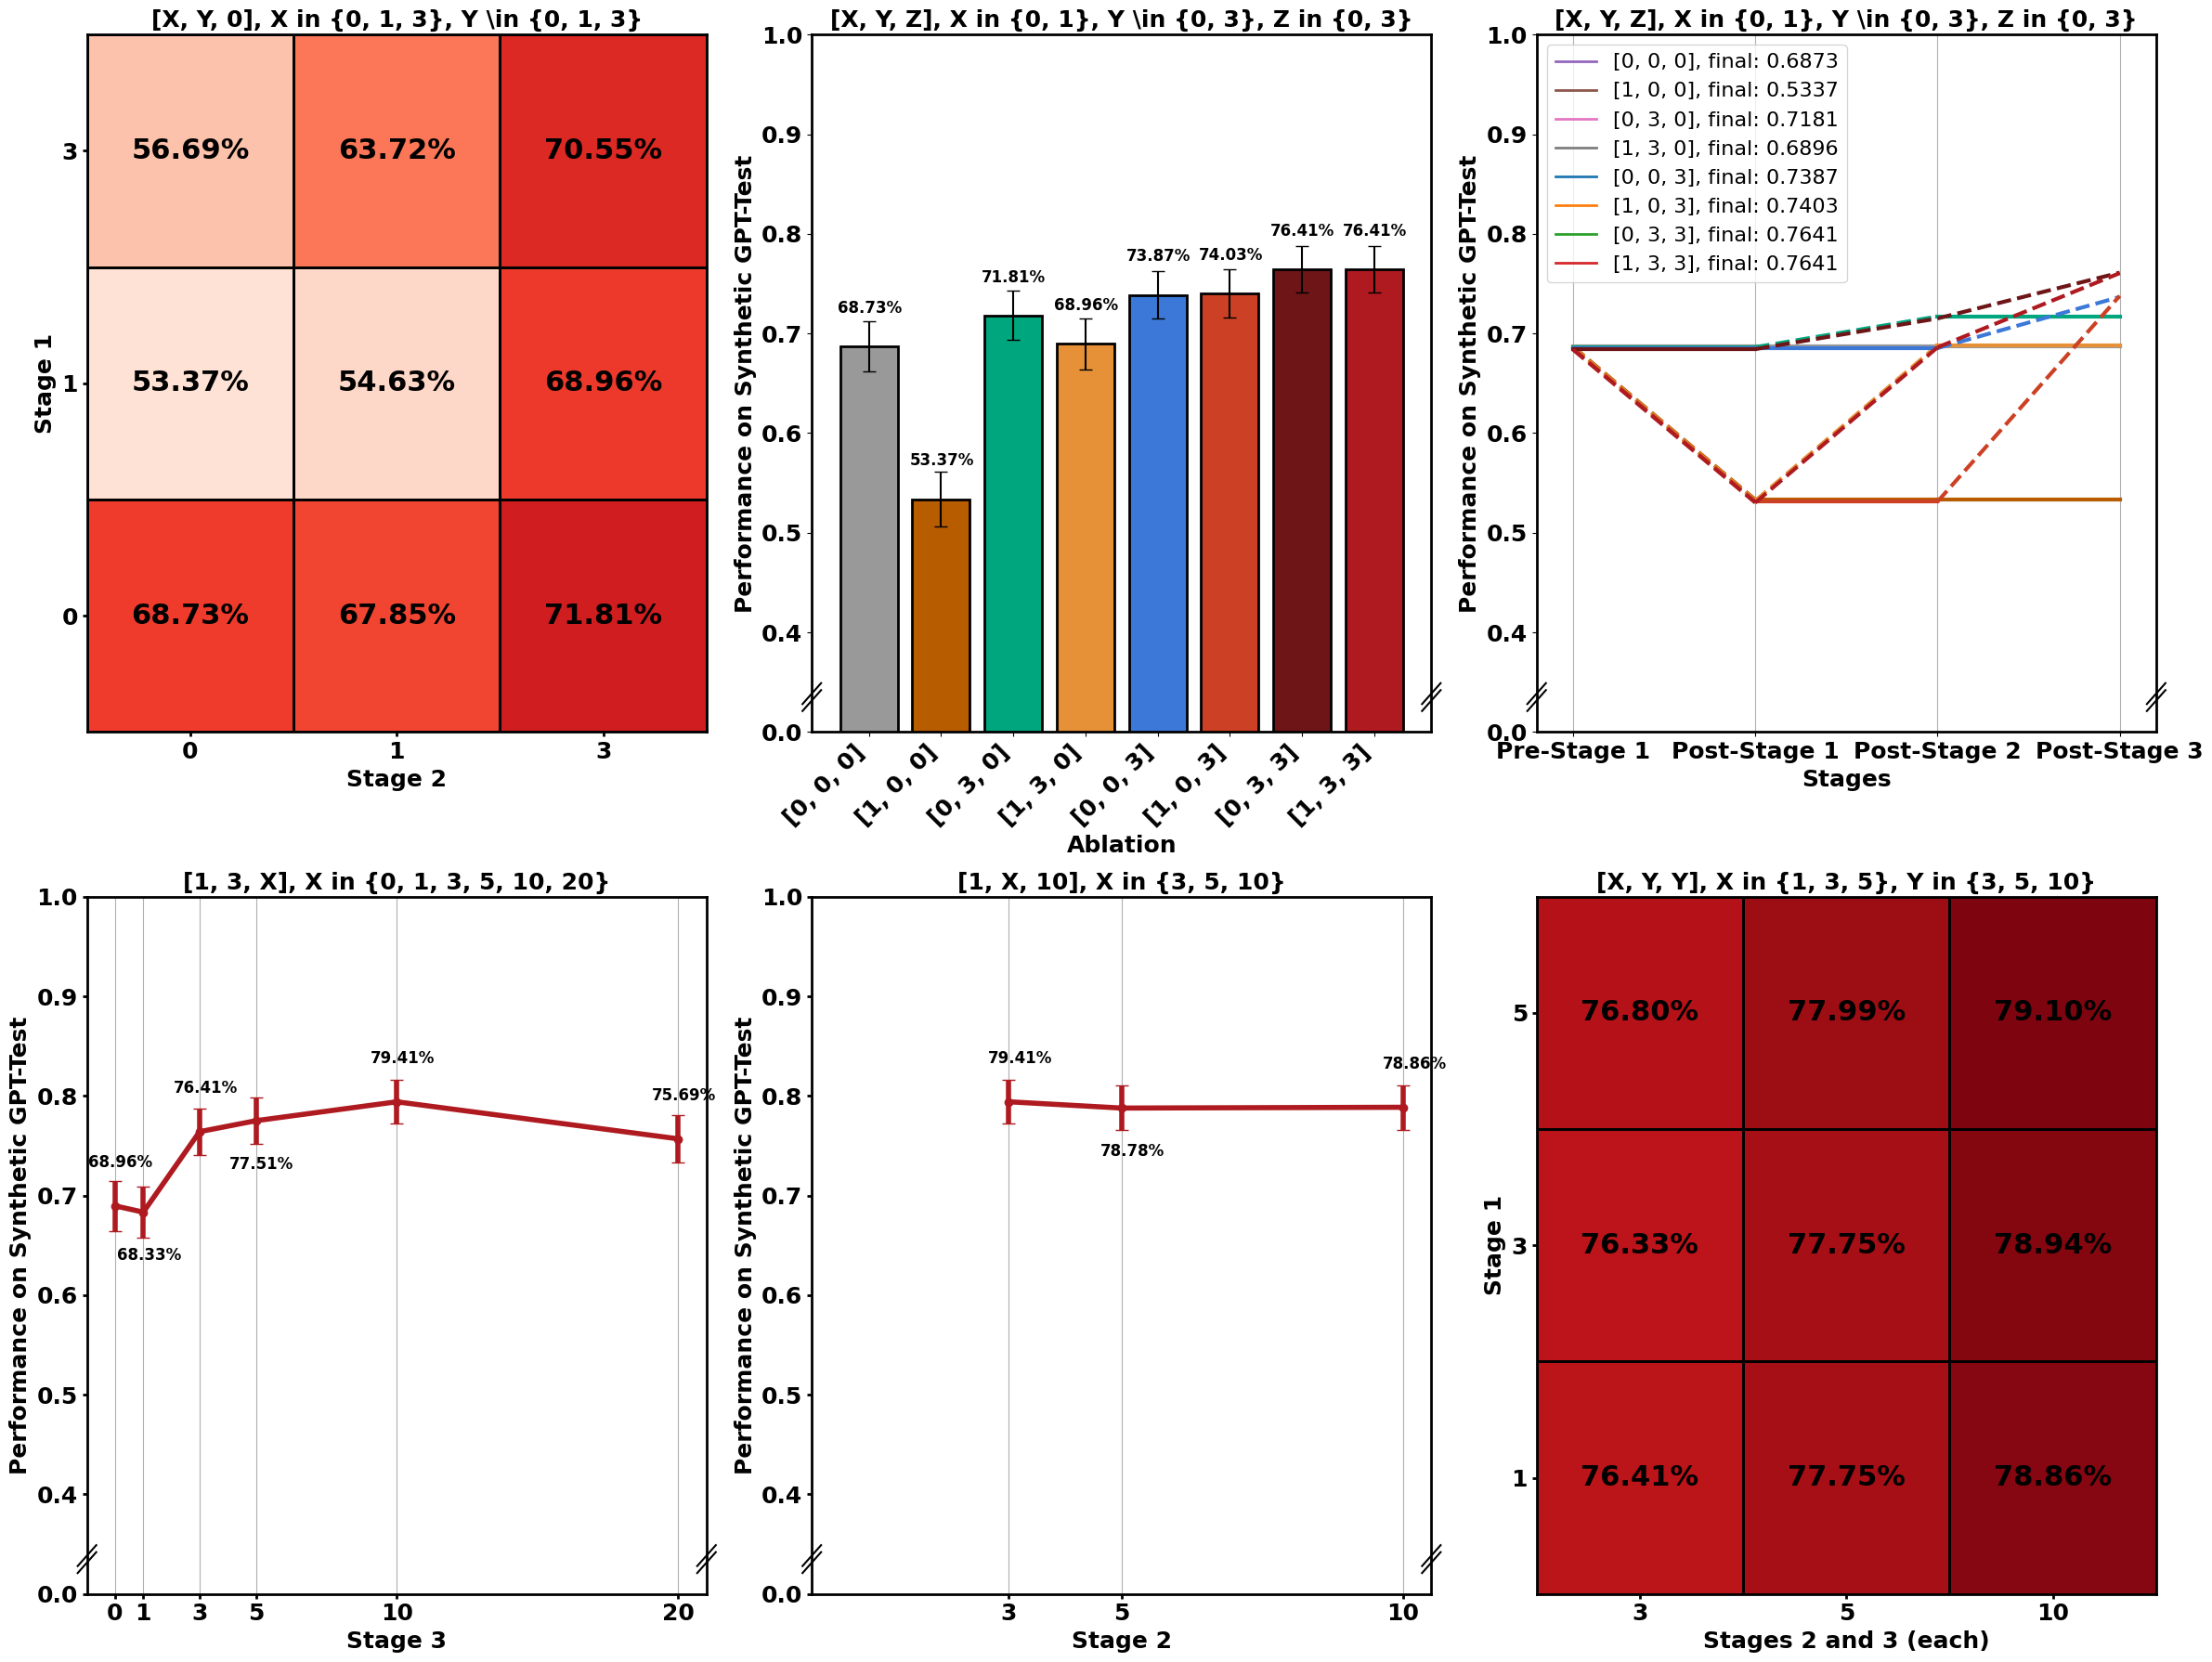

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.transforms import BlendedGenericTransform

to_plot = "GPT"

ylim = [0.3, 1]
yticks = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
ytick_labels = [0.0, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Set the number of samples
n_samples = 1282 if to_plot == "GPT" else 1239

# Error calculation function
def calculate_error_bars(p, n, z=1.96):
    return z * np.sqrt(p * (1 - p) / n)

norm = "linear"

# Assuming 'data' is already defined and the DataFrame has been created
df = pd.DataFrame(data, columns=["Stage 1", "Stage 2", "Stage 3", "GPT", "Claude"])
df = df[["Stage 1", "Stage 2", "Stage 3", to_plot]]

        

# Create the figure and axes as in your original code
fig, axes = plt.subplots(2, 3, figsize=(24, 18))
axes = np.array(axes).flatten()

# # Adjust the figure to have 6 subplots (3 rows, 2 columns)
# fig, axes = plt.subplots(2, 3, figsize=(24, 18))  # Increased height for the new rows

# axes = np.array(axes).flatten()

# Prepare the DataFrame
df['Stage 1'] = df['Stage 1'].astype(int)
df['Stage 2'] = df['Stage 2'].astype(int)
df['Stage 3'] = df['Stage 3'].astype(int)

# Panel 1: Heatmap using imshow
pivot_df_1 = df[(df["Stage 3"] == 0) & (df["Stage 1"].isin([0, 1, 3])) & (df["Stage 2"].isin([0, 1, 3]))].pivot_table(index='Stage 1', columns='Stage 2', values=to_plot)
# Get the data and labels
data_array_1 = pivot_df_1.values[::-1]  # Reverse to match the original heatmap
cmap = plt.get_cmap('Reds')
cax = axes[0].imshow(data_array_1, cmap=cmap, aspect='auto', vmin=0.50, vmax=0.8, norm=norm)
# Add boundaries to the heatmap cells
for i in range(data_array_1.shape[0]):
    for j in range(data_array_1.shape[1]):
        rect = plt.Rectangle((j - 0.5, i - 0.5), 1, 1, fill=False, color='black', linewidth=2)
        axes[0].add_patch(rect)
# For heatmap annotations - convert to percentage
for (i, j), val in np.ndenumerate(data_array_1):
    if not np.isnan(val):  # Only display value if it's not NaN
        axes[0].text(j, i, f"{val*100:.2f}%", 
                     ha='center', va='center', 
                     color='black', 
                     fontsize=22, 
                     fontweight='bold')
# Make axis labels and ticks bold
axes[0].tick_params(width=2)
axes[0].set_xticks(np.arange(len(pivot_df_1.columns)))
axes[0].set_yticks(np.arange(len(pivot_df_1.index)))
axes[0].set_xticklabels(pivot_df_1.columns, fontsize=18, fontweight='bold')
axes[0].set_yticklabels(pivot_df_1.index[::-1], fontsize=18, fontweight='bold')
axes[0].set_xlabel("Stage 2", fontsize=18, fontweight='bold')
axes[0].set_ylabel("Stage 1", fontsize=18, fontweight='bold')
# Set title with bold text and center it
#title = axes[0].set_title(f'Performance on {to_plot}-Synthetic after Generalist training \n[X, Y, 0], X in {{0, 1, 3}}, Y \in {{0, 1, 3}}',
#                          fontsize=16, fontweight='bold')
title = axes[0].set_title(f'[X, Y, 0], X in {{0, 1, 3}}, Y \in {{0, 1, 3}}',
                          fontsize=18, fontweight='bold')
#axes[0].title.set_position([0.5, 1.05])  # Adjust title position to center it
# Set frame linewidth for panel 1
for spine in axes[0].spines.values():
    spine.set_visible(True)  # Make sure the spine is visible
    spine.set_linewidth(2)    # Set the line width

# Panel 2: Bar Plot
ablations_select = np.array([(0, 0, 0), (1, 0, 0), (0, 3, 0), (1, 3, 0), (0, 0, 3), (1, 0, 3), (0, 3, 3), (1, 3, 3)])
mask = df.apply(lambda row: tuple(row[['Stage 1', 'Stage 2', 'Stage 3']]) in map(tuple, ablations_select), axis=1)
missing_stages_df = df[mask].sort_values(["Stage 3", "Stage 2", "Stage 1"], ascending=False).iloc[::-1].reset_index()
missing_stages_df.rename(columns={f'{to_plot}': f'{to_plot}_Post_Stage3'}, inplace=True)
# Initialize new columns
missing_stages_df[f'{to_plot}_Pre_Stage1'] = None
missing_stages_df[f'{to_plot}_Post_Stage1'] = None
missing_stages_df[f'{to_plot}_Post_Stage2'] = None
# Fill in GPT values
for index, row in missing_stages_df.iterrows():
    stage1, stage2, stage3 = row['Stage 1'], row['Stage 2'], row['Stage 3']
    pre_stage1_row = missing_stages_df[(missing_stages_df['Stage 1'] == 0) & (missing_stages_df['Stage 2'] == 0) & (missing_stages_df['Stage 3'] == 0)]
    if not pre_stage1_row.empty:
        missing_stages_df.at[index, f'{to_plot}_Pre_Stage1'] = pre_stage1_row[f'{to_plot}_Post_Stage3'].values[0]
    
    post_stage1_row = missing_stages_df[(missing_stages_df['Stage 1'] == stage1) & (missing_stages_df['Stage 2'] == 0) & (missing_stages_df['Stage 3'] == 0)]
    if not post_stage1_row.empty:
        missing_stages_df.at[index, f'{to_plot}_Post_Stage1'] = post_stage1_row[f'{to_plot}_Post_Stage3'].values[0]
    
    post_stage2_row = missing_stages_df[(missing_stages_df['Stage 1'] == stage1) & (missing_stages_df['Stage 2'] == stage2) & (missing_stages_df['Stage 3'] == 0)]
    if not post_stage2_row.empty:
        missing_stages_df.at[index, f'{to_plot}_Post_Stage2'] = post_stage2_row[f'{to_plot}_Post_Stage3'].values[0]
# Create labels from the stages
labels = missing_stages_df[['Stage 1', 'Stage 2', 'Stage 3']].apply(lambda x: str(list(x)), axis=1)
# Calculate error bars for the bar plot using sqrt(p(1-p)/n)
error_bars = calculate_error_bars(missing_stages_df[f'{to_plot}_Post_Stage3'].values, n_samples)
# Create the bar plot with edge color and error bars
# Create the bar plot with edge color and error bars
bars = axes[1].bar(labels, missing_stages_df[f'{to_plot}_Post_Stage3'].values, yerr=error_bars, capsize=5, 
                   color=[colors[i % 8] for i in range(len(missing_stages_df))], edgecolor='black', linewidth=2)
# Add percentage annotations
for index, bar in enumerate(bars):
    height = bar.get_height()
    axes[1].text(index+0.01, height + 0.03, f"{height*100:.2f}%", 
                 ha='center', va='bottom', 
                 fontsize=12, fontweight='bold')
# Rotate x-ticks for better visibility
axes[1].set_ylim(ylim)
axes[1].set_xticks(range(len(labels)))
axes[1].set_xticklabels(labels, rotation=45, ha='right', fontsize=18, fontweight='bold')
axes[1].set_yticks(np.linspace(0, 1, 11))
axes[1].set_yticklabels(np.linspace(0, 1, 11), fontsize=18, fontweight='bold')
axes[1].set_xlabel('Ablation', fontsize=18, fontweight='bold')
axes[1].set_ylabel(f"Performance on Synthetic {to_plot}-Test", fontsize=18, fontweight='bold')
# axes[1].set_title(f'Performance on {to_plot}-Synthetic with Different Dropped Stages \n[X, Y, Z], X in {{0, 1}}, Y \in {{0, 3}}, Z in {{0, 3}}',
#                   fontsize=16, fontweight='bold')
axes[1].set_title(f'[X, Y, Z], X in {{0, 1}}, Y \in {{0, 3}}, Z in {{0, 3}}',
                  fontsize=18, fontweight='bold')
# Set frame linewidth for panel 2
for spine in axes[1].spines.values():
    spine.set_visible(True)  # Make sure the spine is visible
    spine.set_linewidth(2)    # Set the line width

# Panel 4: Trajectory Plot
for index, row in missing_stages_df.iterrows():
    x = [0, 1, 2, 3]
    y = [row[f'{to_plot}_Pre_Stage1'], row[f'{to_plot}_Post_Stage1'], row[f'{to_plot}_Post_Stage2'], row[f'{to_plot}_Post_Stage3']]
    
    # Calculate error bars
    error_bars = [calculate_error_bars(val, n_samples) for val in y]
    
    for i in range(3):
        if row[f'Stage {i+1}'] == 0:
            axes[2].plot(x[i:i+2], np.array(y[i:i+2]) - index / 2000, color=colors[index % 8], linestyle='-', lw=3)
        else:
            axes[2].plot(x[i:i+2], np.array(y[i:i+2]) - index / 2000, color=colors[index % 8], linestyle='--', lw=3)
        
        # # Add error bars
        # if i == 0:
        #     # For the first segment, add error bars on both ends
        #     axes[2].errorbar(x[i:i+2], np.array(y[i:i+2]) - index / 5000, 
        #                      yerr=[error_bars[i:i+2], error_bars[i:i+2]], 
        #                      fmt='none', ecolor=plt.get_cmap("tab10")((index-4)%8), capsize=5)
        # else:
        #     # For subsequent segments, add error bars only on the right end
        #     axes[2].errorbar(x[i+1], y[i+1] - index / 5000, 
        #                      yerr=error_bars[i+1], 
        #                      fmt='none', ecolor=plt.get_cmap("tab10")((index-4)%8), capsize=5)

    label = f"{str(list(row[['Stage 1', 'Stage 2', 'Stage 3']]))}, final: {row[f'{to_plot}_Post_Stage3']}"
    axes[2].plot([-10000, -1000], [-10000, -1000], color=plt.get_cmap("tab10")((index-4)%8), lw=2, label=label)


# Add labels and title for trajectory plot with bold text
axes[2].set_xlim([-0.2, 3.2])
axes[2].set_ylim(ylim)
axes[2].set_xticks([0, 1, 2, 3])
axes[2].set_xticklabels(['Pre-Stage 1', 'Post-Stage 1', 'Post-Stage 2', 'Post-Stage 3'], fontsize=18, fontweight='bold')
axes[2].set_yticks(np.linspace(0, 1, 11))
axes[2].set_yticklabels(np.linspace(0, 1, 11), fontsize=18, fontweight='bold')
axes[2].grid(axis='x')
axes[2].set_xlabel('Stages', fontsize=18, fontweight='bold')
axes[2].set_ylabel(f"Performance on Synthetic {to_plot}-Test", fontsize=18, fontweight='bold')
# axes[2].set_title(f'Performance on {to_plot}-Synthetic through Training Stages \n[X, Y, Z], X in {{0, 1}}, Y \in {{0, 3}}, Z in {{0, 3}}\n',
#                   fontsize=16, fontweight='bold')
axes[2].set_title(f'[X, Y, Z], X in {{0, 1}}, Y \in {{0, 3}}, Z in {{0, 3}}',
                  fontsize=18, fontweight='bold')
# Set frame linewidth
for spine in axes[2].spines.values():
    spine.set_visible(True)  # Make sure the spine is visible
    spine.set_linewidth(2)    # Set the line width
# Add the legend to the bottom left corner
axes[2].legend(loc='upper left', fontsize=16)

# --- New Subplot 1: Line Plot (Stage 1 = 1, Stage 2 = 3, plot Stage 3 vs GPT) ---
df_line_1 = df[(df["Stage 1"] == 1) & (df["Stage 2"] == 3)].sort_values(by="Stage 3")
error_bars_1 = calculate_error_bars(df_line_1[to_plot], n_samples)
axes[3].errorbar(df_line_1["Stage 3"], df_line_1[to_plot], yerr=error_bars_1, 
                 color="#ae1a1fff", marker='o', linestyle='-', linewidth=4, capsize=5)

axes[3].tick_params(labelsize=12, width=2)
axes[3].set_xlim([-1, 21])
axes[3].set_ylim(ylim)
axes[3].set_xticks([0, 1, 3, 5, 10, 20])
axes[3].set_xticklabels([0, 1, 3, 5, 10, 20], fontsize=18, fontweight='bold')
axes[3].set_yticks(np.linspace(0, 1, 11))
axes[3].set_yticklabels(np.linspace(0, 1, 11), fontsize=18, fontweight='bold')
axes[3].grid(axis='x')
axes[3].set_xlabel('Stage 3', fontsize=18, fontweight='bold')
axes[3].set_ylabel(f"Performance on Synthetic {to_plot}-Test", fontsize=18, fontweight='bold')
# axes[3].set_title(f'Performance on {to_plot}-Synthetic for varied Task-Specific IFT \n[1, 3, X], X in {{0, 1, 3, 5, 10, 20}}',
#                   fontsize=16, fontweight='bold')
axes[3].set_title(f'[1, 3, X], X in {{0, 1, 3, 5, 10, 20}}',
                  fontsize=18, fontweight='bold')
# Set frame linewidth for panel 5
for spine in axes[3].spines.values():
    spine.set_visible(True)
    spine.set_linewidth(2)

# --- New Subplot 2: Line Plot (Stage 1 = 1, Stage 3 = 10, plot Stage 2 vs GPT) ---
df_line_2 = df[(df["Stage 1"] == 1) & (df["Stage 3"] == 10)].sort_values(by="Stage 2")
error_bars_2 = calculate_error_bars(df_line_2[to_plot], n_samples)
axes[4].errorbar(df_line_2["Stage 2"], df_line_2[to_plot], yerr=error_bars_2, 
                 color="#ae1a1fff", marker='o', linestyle='-', linewidth=4, capsize=5)

axes[4].tick_params(width=2)
axes[4].set_xlim([-0.5, 10.5])
axes[4].set_ylim(ylim)
axes[4].set_xticks([3, 5, 10])
axes[4].set_xticklabels([3, 5, 10], fontsize=18, fontweight='bold')

axes[4].set_yticks(np.linspace(0, 1, 11))
axes[4].set_yticklabels(np.linspace(0, 1, 11), fontsize=18, fontweight='bold')
axes[4].grid(axis='x')
axes[4].set_xlabel('Stage 2', fontsize=18, fontweight='bold')
axes[4].set_ylabel(f"Performance on Synthetic {to_plot}-Test", fontsize=18, fontweight='bold')
# axes[4].set_title(f'Performance on {to_plot}-Synthetic for varied Generalist IFT \n[1, X, 10], X in {{3, 5, 10}}',
#                   fontsize=16, fontweight='bold')
axes[4].set_title(f'[1, X, 10], X in {{3, 5, 10}}',
                  fontsize=18, fontweight='bold')
# Set frame linewidth
for spine in axes[4].spines.values():
    spine.set_visible(True)
    spine.set_linewidth(2)

# -- Reordered Subplot 6 (Second Heatmap) --
pivot_df_2 = df[(df["Stage 2"] == df["Stage 3"]) & (df["Stage 1"].isin([1, 3, 5])) & (df["Stage 3"].isin([3, 5, 10]))].pivot_table(index='Stage 1', columns='Stage 3', values=to_plot)

# Get the data and labels
data_array_2 = pivot_df_2.values[::-1]  # Reverse to match the original heatmap
cax = axes[5].imshow(data_array_2, cmap=cmap, aspect='auto', vmin=0.62, vmax=0.8, norm=norm)

# Convert to percentage in annotations
for (i, j), val in np.ndenumerate(data_array_2):
    if not np.isnan(val):  # Only display value if it's not NaN
        axes[5].text(j, i, f"{val*100:.2f}%", 
                     ha='center', va='center', 
                     color='black', 
                     fontsize=22, 
                     fontweight='bold')
# Add boundaries to the heatmap cells
for i in range(data_array_2.shape[0]):
    for j in range(data_array_2.shape[1]):
        rect = plt.Rectangle((j - 0.5, i - 0.5), 1, 1, fill=False, color='black', linewidth=2)
        axes[5].add_patch(rect)
# Setting x and y ticks for new heatmap
axes[5].tick_params(width=2)
axes[5].set_xticks(np.arange(len(pivot_df_2.columns)))
axes[5].set_xticklabels(pivot_df_2.columns, fontsize=18, fontweight='bold')
axes[5].set_yticks(np.arange(len(pivot_df_2.index)))
axes[5].set_yticklabels(pivot_df_2.index[::-1], fontsize=18, fontweight='bold')  # Reverse to match original heatmap

axes[5].set_xlabel("Stages 2 and 3 (each)",  fontsize=18, fontweight='bold')
axes[5].set_ylabel("Stage 1",  fontsize=18, fontweight='bold')
# axes[5].set_title(f'Performance on {to_plot}-Synthetic for varied Align x IFT\n[X, Y, Y], X in {{1, 3, 5}}, Y in {{3, 5, 10}}',
#                           fontsize=16, fontweight='bold')
axes[5].set_title(f'[X, Y, Y], X in {{1, 3, 5}}, Y in {{3, 5, 10}}',
                          fontsize=18, fontweight='bold')
# Set frame linewidth
for spine in axes[5].spines.values():
    spine.set_visible(True)
    spine.set_linewidth(2)


# Percentage annotations for bottom line plots
for i in [3, 4]:  # Axes for the two line plots
    if i == 3:  # First line plot (Stage 3 variation)
        df_line = df_line_1
    else:  # Second line plot (Stage 2 variation)
        df_line = df_line_2
    
    # Iterate through datapoints
    for j, (stage, value) in enumerate(zip(df_line[f"Stage {3 if i==3 else 2}"], df_line[to_plot])):
        # Determine vertical position and offset
        if stage in [1, 5]:
            va = 'top'
            offset = -0.035
        else:
            va = 'bottom'
            offset = 0.035
        
        # Add percentage annotation
        axes[i].text(stage + 0.2, value + offset, f"{value*100:.2f}%", 
                     ha='center', va=va, 
                     fontsize=12, fontweight='bold')

# # After plotting each of the relevant subplots (3, 4, and 5), add the break lines
for i in [1, 2, 3, 4]:
    axes[i].set_ylim(ylim)
    axes[i].set_yticks(yticks)
    axes[i].set_yticklabels(ytick_labels)


    # Add break lines to create the illusion of a broken axis
    break_point = 0.05
    d = .015  # Size of the diagonal lines in axes coordinates
    offset = 0.005
    kwargs = dict(transform=axes[i].transAxes, color='k', clip_on=False)
    axes[i].plot((-d, +d), (break_point - d - offset, break_point + d - offset), **kwargs)
    axes[i].plot((-d, +d), (break_point - d + offset, break_point + d + offset), **kwargs)
    axes[i].plot((1 - d, 1 + d), (break_point - d - offset, break_point + d - offset), **kwargs)
    axes[i].plot((1 - d, 1 + d), (break_point - d + offset, break_point + d + offset), **kwargs)

# Adjust the layout to prevent overlap
plt.tight_layout()
fig.savefig("./figures/obsidian_figure_s3.png", format='png', dpi=1200, bbox_inches='tight')
plt.show()

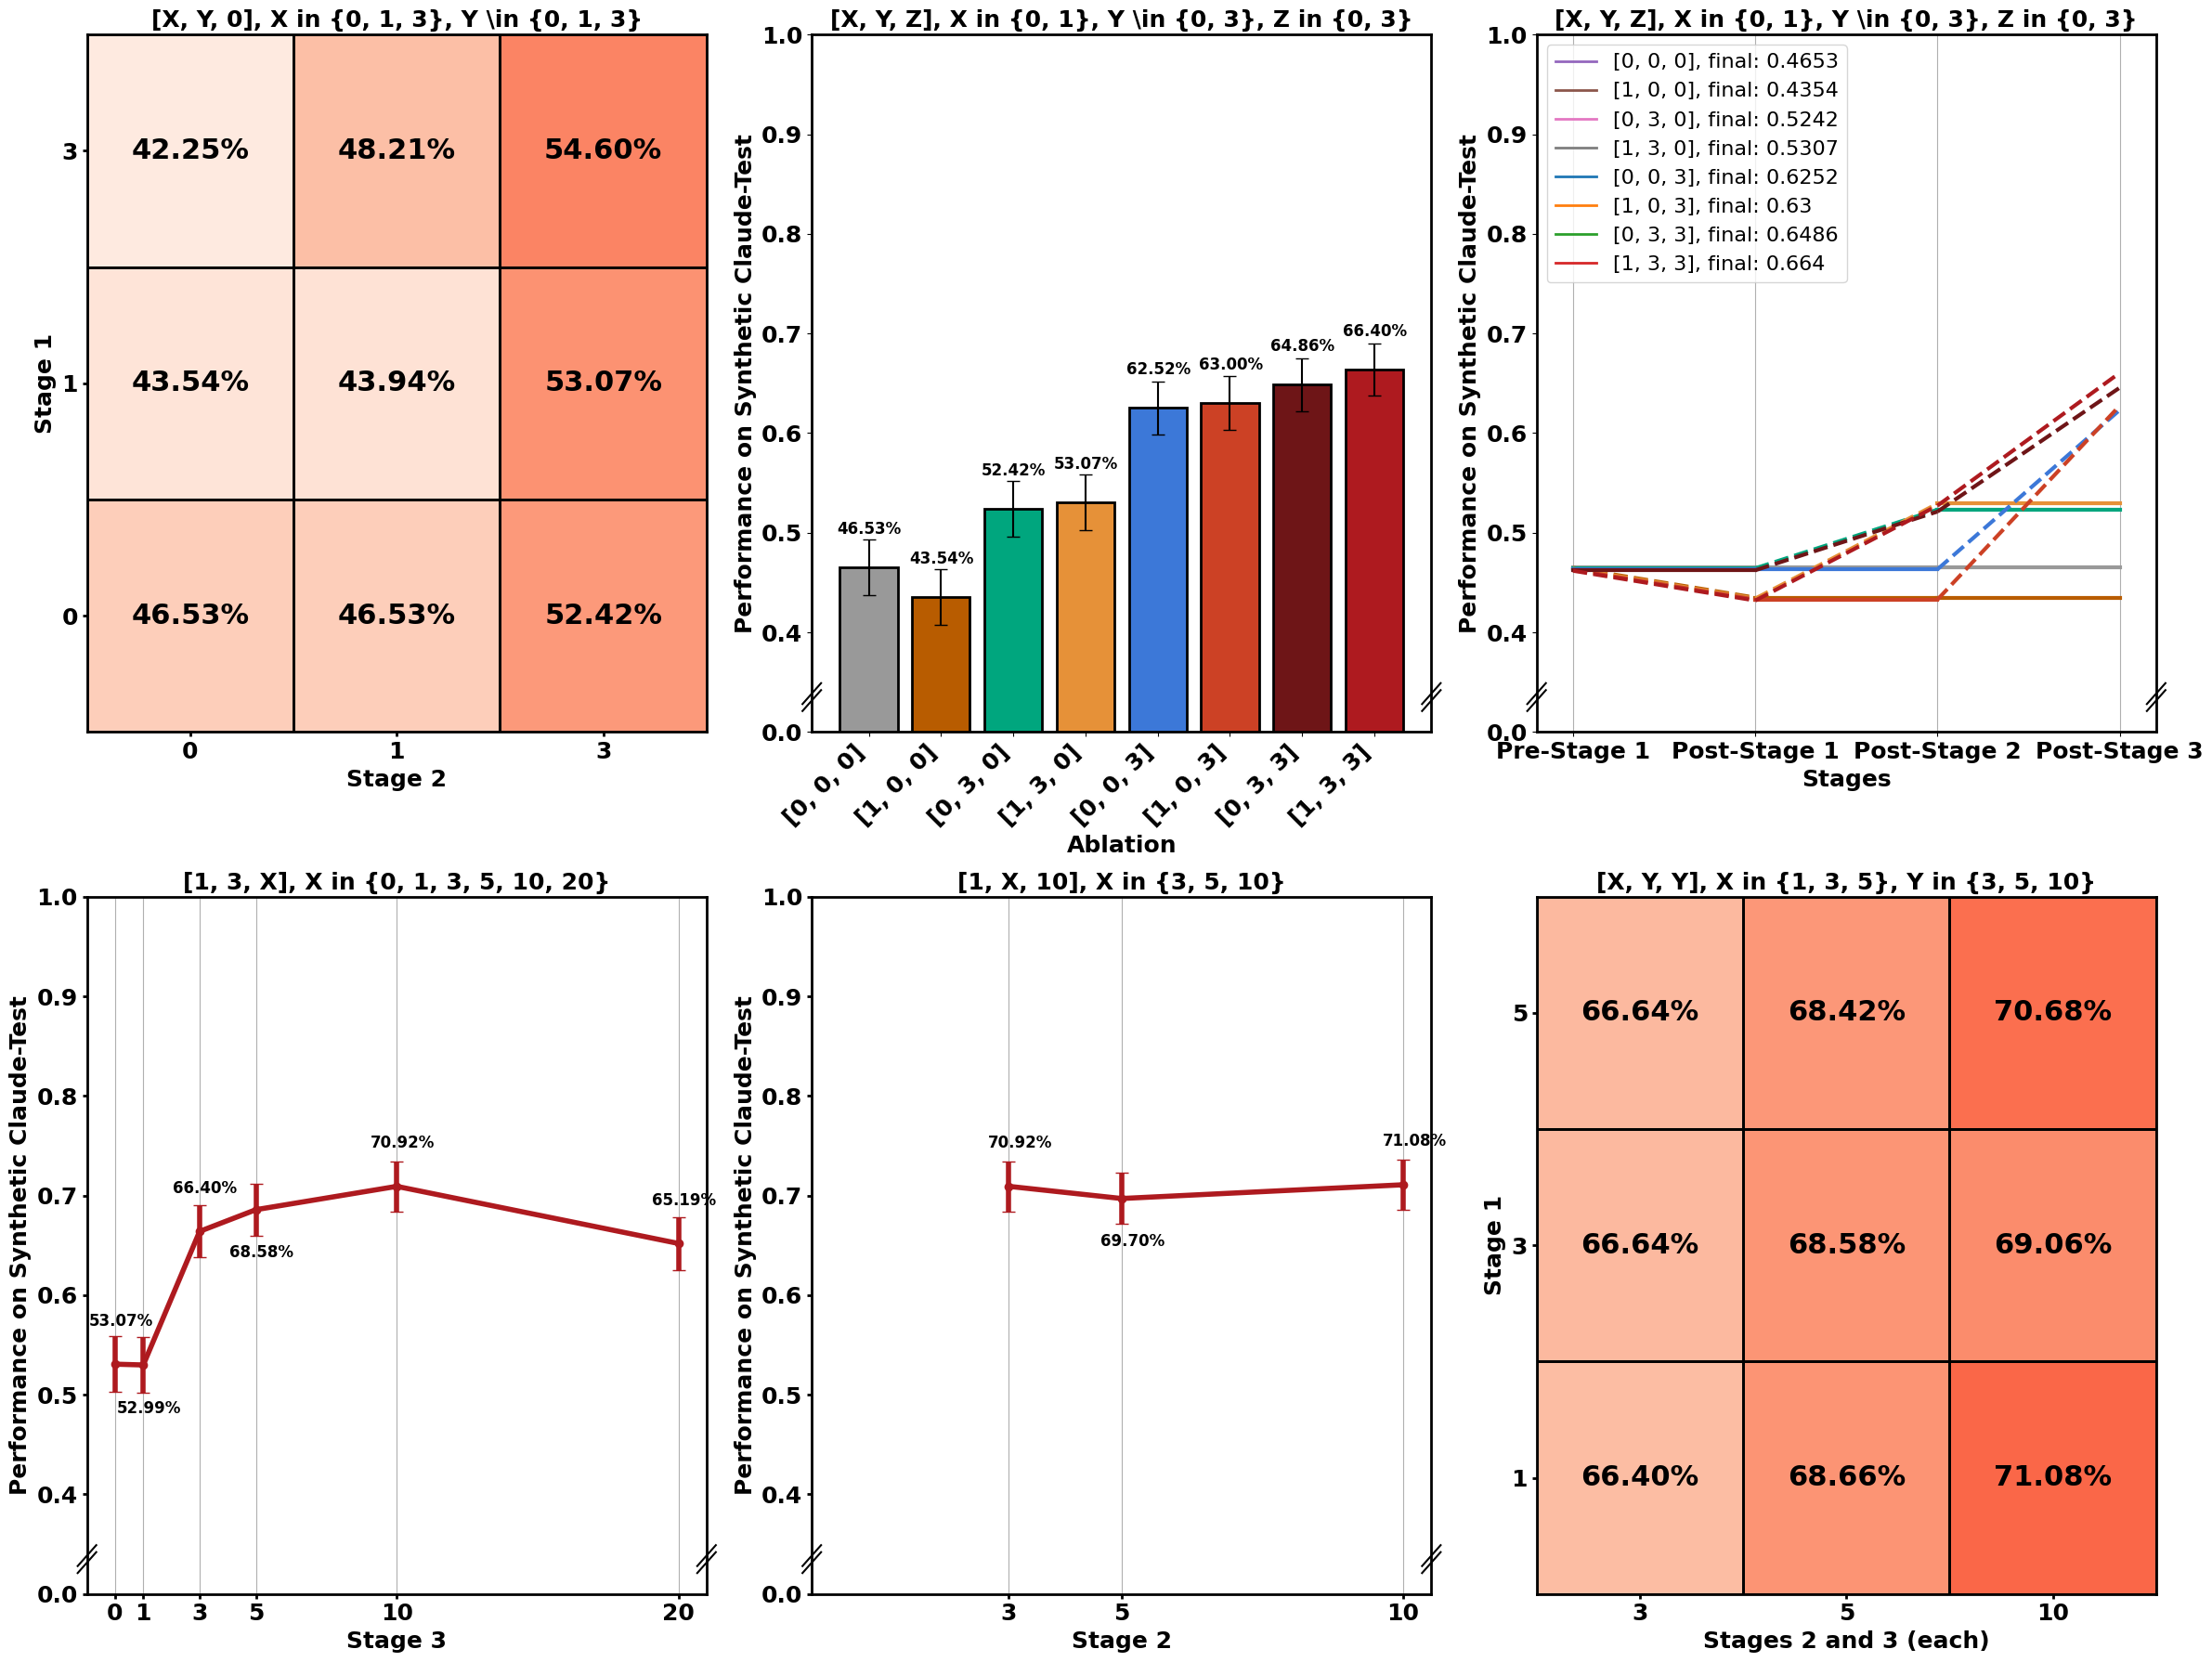

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.transforms import BlendedGenericTransform

to_plot = "Claude"

ylim = [0.3, 1]
yticks = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
ytick_labels = [0.0, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Set the number of samples
n_samples = 1282 if to_plot == "GPT" else 1239

# Error calculation function
def calculate_error_bars(p, n, z=1.96):
    return z * np.sqrt(p * (1 - p) / n)

norm = "linear"

# Assuming 'data' is already defined and the DataFrame has been created
df = pd.DataFrame(data, columns=["Stage 1", "Stage 2", "Stage 3", "GPT", "Claude"])
df = df[["Stage 1", "Stage 2", "Stage 3", to_plot]]

        

# Create the figure and axes as in your original code
fig, axes = plt.subplots(2, 3, figsize=(24, 18))
axes = np.array(axes).flatten()

# # Adjust the figure to have 6 subplots (3 rows, 2 columns)
# fig, axes = plt.subplots(2, 3, figsize=(24, 18))  # Increased height for the new rows

# axes = np.array(axes).flatten()

# Prepare the DataFrame
df['Stage 1'] = df['Stage 1'].astype(int)
df['Stage 2'] = df['Stage 2'].astype(int)
df['Stage 3'] = df['Stage 3'].astype(int)

# Panel 1: Heatmap using imshow
pivot_df_1 = df[(df["Stage 3"] == 0) & (df["Stage 1"].isin([0, 1, 3])) & (df["Stage 2"].isin([0, 1, 3]))].pivot_table(index='Stage 1', columns='Stage 2', values=to_plot)
# Get the data and labels
data_array_1 = pivot_df_1.values[::-1]  # Reverse to match the original heatmap
cmap = plt.get_cmap('Reds')
cax = axes[0].imshow(data_array_1, cmap=cmap, aspect='auto', vmin=0.40, vmax=0.75, norm=norm)
# Add boundaries to the heatmap cells
for i in range(data_array_1.shape[0]):
    for j in range(data_array_1.shape[1]):
        rect = plt.Rectangle((j - 0.5, i - 0.5), 1, 1, fill=False, color='black', linewidth=2)
        axes[0].add_patch(rect)
# For heatmap annotations - convert to percentage
for (i, j), val in np.ndenumerate(data_array_1):
    if not np.isnan(val):  # Only display value if it's not NaN
        axes[0].text(j, i, f"{val*100:.2f}%", 
                     ha='center', va='center', 
                     color='black', 
                     fontsize=22, 
                     fontweight='bold')
# Make axis labels and ticks bold
axes[0].tick_params(width=2)
axes[0].set_xticks(np.arange(len(pivot_df_1.columns)))
axes[0].set_yticks(np.arange(len(pivot_df_1.index)))
axes[0].set_xticklabels(pivot_df_1.columns, fontsize=18, fontweight='bold')
axes[0].set_yticklabels(pivot_df_1.index[::-1], fontsize=18, fontweight='bold')
axes[0].set_xlabel("Stage 2", fontsize=18, fontweight='bold')
axes[0].set_ylabel("Stage 1", fontsize=18, fontweight='bold')
# Set title with bold text and center it
#title = axes[0].set_title(f'Performance on {to_plot}-Synthetic after Generalist training \n[X, Y, 0], X in {{0, 1, 3}}, Y \in {{0, 1, 3}}',
#                          fontsize=16, fontweight='bold')
title = axes[0].set_title(f'[X, Y, 0], X in {{0, 1, 3}}, Y \in {{0, 1, 3}}',
                          fontsize=18, fontweight='bold')
#axes[0].title.set_position([0.5, 1.05])  # Adjust title position to center it
# Set frame linewidth for panel 1
for spine in axes[0].spines.values():
    spine.set_visible(True)  # Make sure the spine is visible
    spine.set_linewidth(2)    # Set the line width

# Panel 2: Bar Plot
ablations_select = np.array([(0, 0, 0), (1, 0, 0), (0, 3, 0), (1, 3, 0), (0, 0, 3), (1, 0, 3), (0, 3, 3), (1, 3, 3)])
mask = df.apply(lambda row: tuple(row[['Stage 1', 'Stage 2', 'Stage 3']]) in map(tuple, ablations_select), axis=1)
missing_stages_df = df[mask].sort_values(["Stage 3", "Stage 2", "Stage 1"], ascending=False).iloc[::-1].reset_index()
missing_stages_df.rename(columns={f'{to_plot}': f'{to_plot}_Post_Stage3'}, inplace=True)
# Initialize new columns
missing_stages_df[f'{to_plot}_Pre_Stage1'] = None
missing_stages_df[f'{to_plot}_Post_Stage1'] = None
missing_stages_df[f'{to_plot}_Post_Stage2'] = None
# Fill in GPT values
for index, row in missing_stages_df.iterrows():
    stage1, stage2, stage3 = row['Stage 1'], row['Stage 2'], row['Stage 3']
    pre_stage1_row = missing_stages_df[(missing_stages_df['Stage 1'] == 0) & (missing_stages_df['Stage 2'] == 0) & (missing_stages_df['Stage 3'] == 0)]
    if not pre_stage1_row.empty:
        missing_stages_df.at[index, f'{to_plot}_Pre_Stage1'] = pre_stage1_row[f'{to_plot}_Post_Stage3'].values[0]
    
    post_stage1_row = missing_stages_df[(missing_stages_df['Stage 1'] == stage1) & (missing_stages_df['Stage 2'] == 0) & (missing_stages_df['Stage 3'] == 0)]
    if not post_stage1_row.empty:
        missing_stages_df.at[index, f'{to_plot}_Post_Stage1'] = post_stage1_row[f'{to_plot}_Post_Stage3'].values[0]
    
    post_stage2_row = missing_stages_df[(missing_stages_df['Stage 1'] == stage1) & (missing_stages_df['Stage 2'] == stage2) & (missing_stages_df['Stage 3'] == 0)]
    if not post_stage2_row.empty:
        missing_stages_df.at[index, f'{to_plot}_Post_Stage2'] = post_stage2_row[f'{to_plot}_Post_Stage3'].values[0]
# Create labels from the stages
labels = missing_stages_df[['Stage 1', 'Stage 2', 'Stage 3']].apply(lambda x: str(list(x)), axis=1)
# Calculate error bars for the bar plot using sqrt(p(1-p)/n)
error_bars = calculate_error_bars(missing_stages_df[f'{to_plot}_Post_Stage3'].values, n_samples)
# Create the bar plot with edge color and error bars
# Create the bar plot with edge color and error bars
bars = axes[1].bar(labels, missing_stages_df[f'{to_plot}_Post_Stage3'].values, yerr=error_bars, capsize=5, 
                   color=[colors[i % 8] for i in range(len(missing_stages_df))], edgecolor='black', linewidth=2)
# Add percentage annotations
for index, bar in enumerate(bars):
    height = bar.get_height()
    axes[1].text(index+0.01, height + 0.03, f"{height*100:.2f}%", 
                 ha='center', va='bottom', 
                 fontsize=12, fontweight='bold')
# Rotate x-ticks for better visibility
axes[1].set_ylim(ylim)
axes[1].set_xticks(range(len(labels)))
axes[1].set_xticklabels(labels, rotation=45, ha='right', fontsize=18, fontweight='bold')
axes[1].set_yticks(np.linspace(0, 1, 11))
axes[1].set_yticklabels(np.linspace(0, 1, 11), fontsize=18, fontweight='bold')
axes[1].set_xlabel('Ablation', fontsize=18, fontweight='bold')
axes[1].set_ylabel(f"Performance on Synthetic {to_plot}-Test", fontsize=18, fontweight='bold')
# axes[1].set_title(f'Performance on {to_plot}-Synthetic with Different Dropped Stages \n[X, Y, Z], X in {{0, 1}}, Y \in {{0, 3}}, Z in {{0, 3}}',
#                   fontsize=16, fontweight='bold')
axes[1].set_title(f'[X, Y, Z], X in {{0, 1}}, Y \in {{0, 3}}, Z in {{0, 3}}',
                  fontsize=18, fontweight='bold')
# Set frame linewidth for panel 2
for spine in axes[1].spines.values():
    spine.set_visible(True)  # Make sure the spine is visible
    spine.set_linewidth(2)    # Set the line width

# Panel 4: Trajectory Plot
for index, row in missing_stages_df.iterrows():
    x = [0, 1, 2, 3]
    y = [row[f'{to_plot}_Pre_Stage1'], row[f'{to_plot}_Post_Stage1'], row[f'{to_plot}_Post_Stage2'], row[f'{to_plot}_Post_Stage3']]
    
    # Calculate error bars
    error_bars = [calculate_error_bars(val, n_samples) for val in y]
    
    for i in range(3):
        if row[f'Stage {i+1}'] == 0:
            axes[2].plot(x[i:i+2], np.array(y[i:i+2]) - index / 2000, color=colors[index % 8], linestyle='-', lw=3)
        else:
            axes[2].plot(x[i:i+2], np.array(y[i:i+2]) - index / 2000, color=colors[index % 8], linestyle='--', lw=3)        
        # # Add error bars
        # if i == 0:
        #     # For the first segment, add error bars on both ends
        #     axes[2].errorbar(x[i:i+2], np.array(y[i:i+2]) - index / 5000, 
        #                      yerr=[error_bars[i:i+2], error_bars[i:i+2]], 
        #                      fmt='none', ecolor=plt.get_cmap("tab10")((index-4)%8), capsize=5)
        # else:
        #     # For subsequent segments, add error bars only on the right end
        #     axes[2].errorbar(x[i+1], y[i+1] - index / 5000, 
        #                      yerr=error_bars[i+1], 
        #                      fmt='none', ecolor=plt.get_cmap("tab10")((index-4)%8), capsize=5)

    label = f"{str(list(row[['Stage 1', 'Stage 2', 'Stage 3']]))}, final: {row[f'{to_plot}_Post_Stage3']}"
    axes[2].plot([-10000, -1000], [-10000, -1000], color=plt.get_cmap("tab10")((index-4)%8), lw=2, label=label)


# Add labels and title for trajectory plot with bold text
axes[2].set_xlim([-0.2, 3.2])
axes[2].set_ylim(ylim)
axes[2].set_xticks([0, 1, 2, 3])
axes[2].set_xticklabels(['Pre-Stage 1', 'Post-Stage 1', 'Post-Stage 2', 'Post-Stage 3'], fontsize=18, fontweight='bold')
axes[2].set_yticks(np.linspace(0, 1, 11))
axes[2].set_yticklabels(np.linspace(0, 1, 11), fontsize=18, fontweight='bold')
axes[2].grid(axis='x')
axes[2].set_xlabel('Stages', fontsize=18, fontweight='bold')
axes[2].set_ylabel(f"Performance on Synthetic {to_plot}-Test", fontsize=18, fontweight='bold')
# axes[2].set_title(f'Performance on {to_plot}-Synthetic through Training Stages \n[X, Y, Z], X in {{0, 1}}, Y \in {{0, 3}}, Z in {{0, 3}}',
#                   fontsize=16, fontweight='bold')
axes[2].set_title(f'[X, Y, Z], X in {{0, 1}}, Y \in {{0, 3}}, Z in {{0, 3}}',
                  fontsize=18, fontweight='bold')
# Set frame linewidth
for spine in axes[2].spines.values():
    spine.set_visible(True)  # Make sure the spine is visible
    spine.set_linewidth(2)    # Set the line width
# Add the legend to the bottom left corner
axes[2].legend(loc='upper left', fontsize=16)

# --- New Subplot 1: Line Plot (Stage 1 = 1, Stage 2 = 3, plot Stage 3 vs GPT) ---
df_line_1 = df[(df["Stage 1"] == 1) & (df["Stage 2"] == 3)].sort_values(by="Stage 3")
error_bars_1 = calculate_error_bars(df_line_1[to_plot], n_samples)
axes[3].errorbar(df_line_1["Stage 3"], df_line_1[to_plot], yerr=error_bars_1, 
                 color="#ae1a1fff", marker='o', linestyle='-', linewidth=4, capsize=5)

axes[3].tick_params(labelsize=12, width=2)
axes[3].set_xlim([-1, 21])
axes[3].set_ylim(ylim)
axes[3].set_xticks([0, 1, 3, 5, 10, 20])
axes[3].set_xticklabels([0, 1, 3, 5, 10, 20], fontsize=18, fontweight='bold')
axes[3].set_yticks(np.linspace(0, 1, 11))
axes[3].set_yticklabels(np.linspace(0, 1, 11), fontsize=18, fontweight='bold')
axes[3].grid(axis='x')
axes[3].set_xlabel('Stage 3', fontsize=18, fontweight='bold')
axes[3].set_ylabel(f"Performance on Synthetic {to_plot}-Test", fontsize=18, fontweight='bold')
# axes[3].set_title(f'Performance on {to_plot}-Synthetic for varied Task-Specific IFT \n[1, 3, X], X in {{0, 1, 3, 5, 10, 20}}',
#                   fontsize=16, fontweight='bold')
axes[3].set_title(f'[1, 3, X], X in {{0, 1, 3, 5, 10, 20}}',
                  fontsize=18, fontweight='bold')
# Set frame linewidth for panel 5
for spine in axes[3].spines.values():
    spine.set_visible(True)
    spine.set_linewidth(2)

# --- New Subplot 2: Line Plot (Stage 1 = 1, Stage 3 = 10, plot Stage 2 vs GPT) ---
df_line_2 = df[(df["Stage 1"] == 1) & (df["Stage 3"] == 10)].sort_values(by="Stage 2")
error_bars_2 = calculate_error_bars(df_line_2[to_plot], n_samples)
axes[4].errorbar(df_line_2["Stage 2"], df_line_2[to_plot], yerr=error_bars_2, 
                 color="#ae1a1fff", marker='o', linestyle='-', linewidth=4, capsize=5)

axes[4].tick_params(width=2)
axes[4].set_xlim([-0.5, 10.5])
axes[4].set_ylim(ylim)
axes[4].set_xticks([3, 5, 10])
axes[4].set_xticklabels([3, 5, 10], fontsize=18, fontweight='bold')

axes[4].set_yticks(np.linspace(0, 1, 11))
axes[4].set_yticklabels(np.linspace(0, 1, 11), fontsize=18, fontweight='bold')
axes[4].grid(axis='x')
axes[4].set_xlabel('Stage 2', fontsize=18, fontweight='bold')
axes[4].set_ylabel(f"Performance on Synthetic {to_plot}-Test", fontsize=18, fontweight='bold')
# axes[4].set_title(f'Performance on {to_plot}-Synthetic for varied Generalist IFT \n[1, X, 10], X in {{3, 5, 10}}',
#                   fontsize=16, fontweight='bold')
axes[4].set_title(f'[1, X, 10], X in {{3, 5, 10}}',
                  fontsize=18, fontweight='bold')
# Set frame linewidth
for spine in axes[4].spines.values():
    spine.set_visible(True)
    spine.set_linewidth(2)

# -- Reordered Subplot 6 (Second Heatmap) --
pivot_df_2 = df[(df["Stage 2"] == df["Stage 3"]) & (df["Stage 1"].isin([1, 3, 5])) & (df["Stage 3"].isin([3, 5, 10]))].pivot_table(index='Stage 1', columns='Stage 3', values=to_plot)

# Get the data and labels
data_array_2 = pivot_df_2.values[::-1]  # Reverse to match the original heatmap
cax = axes[5].imshow(data_array_2, cmap=cmap, aspect='auto', vmin=0.62, vmax=0.8, norm=norm)

# Convert to percentage in annotations
for (i, j), val in np.ndenumerate(data_array_2):
    if not np.isnan(val):  # Only display value if it's not NaN
        axes[5].text(j, i, f"{val*100:.2f}%", 
                     ha='center', va='center', 
                     color='black', 
                     fontsize=22, 
                     fontweight='bold')
# Add boundaries to the heatmap cells
for i in range(data_array_2.shape[0]):
    for j in range(data_array_2.shape[1]):
        rect = plt.Rectangle((j - 0.5, i - 0.5), 1, 1, fill=False, color='black', linewidth=2)
        axes[5].add_patch(rect)
# Setting x and y ticks for new heatmap
axes[5].tick_params(width=2)
axes[5].set_xticks(np.arange(len(pivot_df_2.columns)))
axes[5].set_xticklabels(pivot_df_2.columns, fontsize=18, fontweight='bold')
axes[5].set_yticks(np.arange(len(pivot_df_2.index)))
axes[5].set_yticklabels(pivot_df_2.index[::-1], fontsize=18, fontweight='bold')  # Reverse to match original heatmap

axes[5].set_xlabel("Stages 2 and 3 (each)",  fontsize=18, fontweight='bold')
axes[5].set_ylabel("Stage 1",  fontsize=18, fontweight='bold')
# axes[5].set_title(f'Performance on {to_plot}-Synthetic for varied Align x IFT\n[X, Y, Y], X in {{1, 3, 5}}, Y in {{3, 5, 10}}',
#                           fontsize=16, fontweight='bold')
axes[5].set_title(f'[X, Y, Y], X in {{1, 3, 5}}, Y in {{3, 5, 10}}',
                          fontsize=18, fontweight='bold')
# Set frame linewidth
for spine in axes[5].spines.values():
    spine.set_visible(True)
    spine.set_linewidth(2)


# Percentage annotations for bottom line plots
for i in [3, 4]:  # Axes for the two line plots
    if i == 3:  # First line plot (Stage 3 variation)
        df_line = df_line_1
    else:  # Second line plot (Stage 2 variation)
        df_line = df_line_2
    
    # Iterate through datapoints
    for j, (stage, value) in enumerate(zip(df_line[f"Stage {3 if i==3 else 2}"], df_line[to_plot])):
        # Determine vertical position and offset
        if stage in [1, 5]:
            va = 'top'
            offset = -0.035
        else:
            va = 'bottom'
            offset = 0.035
        
        # Add percentage annotation
        axes[i].text(stage + 0.2, value + offset, f"{value*100:.2f}%", 
                     ha='center', va=va, 
                     fontsize=12, fontweight='bold')

# # After plotting each of the relevant subplots (3, 4, and 5), add the break lines
for i in [1, 2, 3, 4]:
    axes[i].set_ylim(ylim)
    axes[i].set_yticks(yticks)
    axes[i].set_yticklabels(ytick_labels)


    # Add break lines to create the illusion of a broken axis
    break_point = 0.05
    d = .015  # Size of the diagonal lines in axes coordinates
    offset = 0.005
    kwargs = dict(transform=axes[i].transAxes, color='k', clip_on=False)
    axes[i].plot((-d, +d), (break_point - d - offset, break_point + d - offset), **kwargs)
    axes[i].plot((-d, +d), (break_point - d + offset, break_point + d + offset), **kwargs)
    axes[i].plot((1 - d, 1 + d), (break_point - d - offset, break_point + d - offset), **kwargs)
    axes[i].plot((1 - d, 1 + d), (break_point - d + offset, break_point + d + offset), **kwargs)

# Adjust the layout to prevent overlap
plt.tight_layout()
fig.savefig("./figures/obsidian_figure_s4.png", format='png', dpi=1200, bbox_inches='tight')
plt.show()

In [8]:
both_data = np.array([
       [ 1.    ,  3.    ,  5.    , 0.7886 , 0.7237 ],
       [ 1.    ,  3.    ,  10.   , 0.7949 , 0.731  ],
       [ 5.    ,  10.   ,  5.    , 0.7791 , 0.7173 ],
       [ 5.    ,  10.   ,  10.   , 0.7918 , 0.7439 ],
])

both_df = pd.DataFrame(both_data, columns=["Stage 1", "Stage 2", "Stage 3", "GPT", "Claude"])

gpt_data = np.array([
       [ 1.    ,  1.    ,  1.    ,  0.8116 , 0.6438 ],
       [ 1.    ,  1.    ,  1.    ,  0.8171 , 0.6392 ],
])

gpt_df = pd.DataFrame(gpt_data, columns=["Stage 1", "Stage 2", "Stage 3", "GPT", "Claude"])

# Recreate the DataFrame
single_data = np.array([ 
       [ 1.    ,  3.    , 10.    , 0.7941 , 0.7092 ],  
       [ 5.    , 10.    , 10.    , 0.791  , 0.7068 ],
])

single_df = pd.DataFrame(single_data, columns=["Stage 1", "Stage 2", "Stage 3", "GPT", "Claude"])

In [9]:
labels

0    [0, 0, 0]
1    [1, 0, 0]
2    [0, 3, 0]
3    [1, 3, 0]
4    [0, 0, 3]
5    [1, 0, 3]
6    [0, 3, 3]
7    [1, 3, 3]
dtype: object

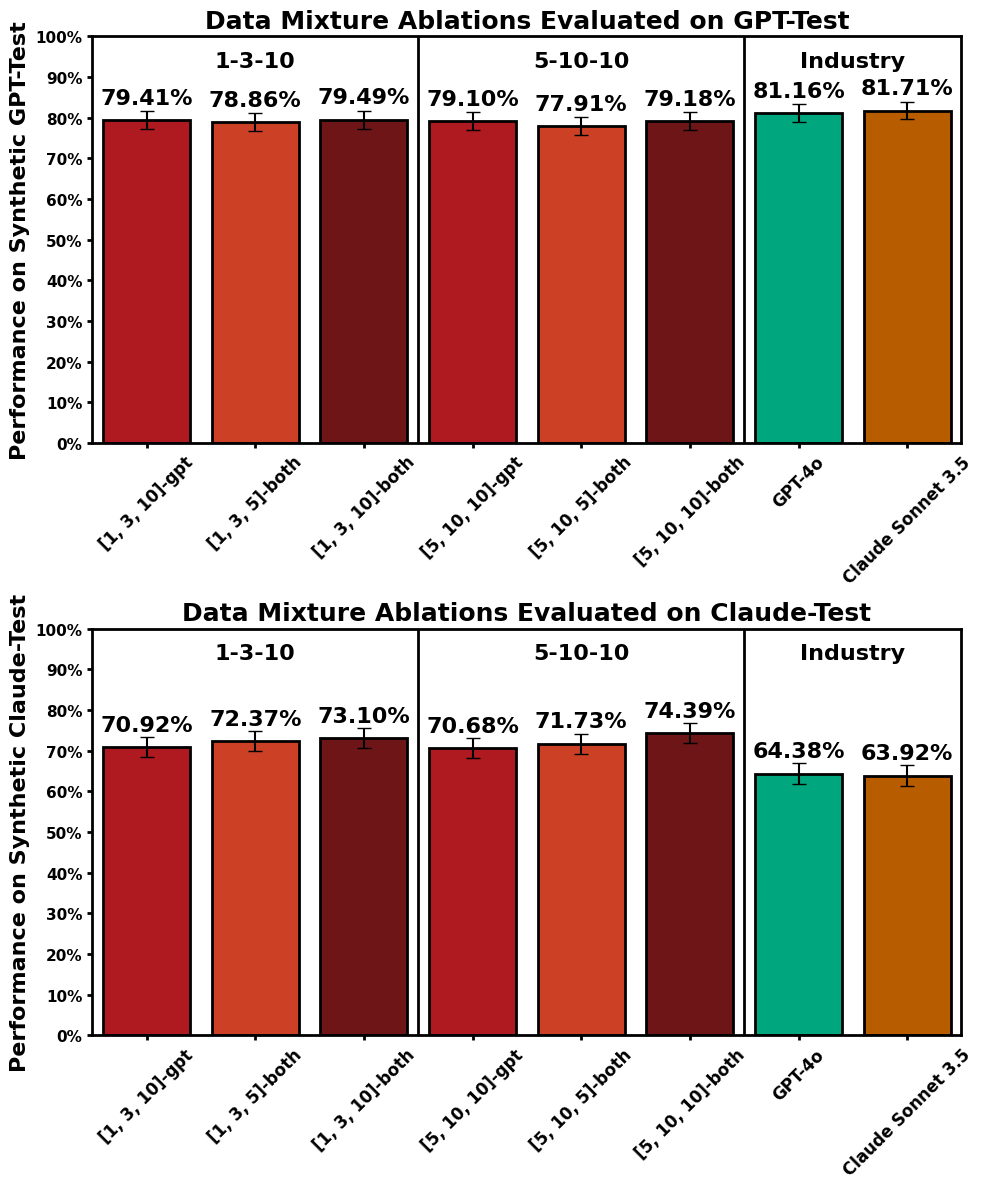

In [10]:
# Combine the 9 required entries
combined_data = pd.DataFrame(np.vstack((single_data,
                                        both_data,
                                        gpt_data))[[0, 2, 3, 1, 4, 5, 6, 7]],
                             columns=["Stage 1", "Stage 2", "Stage 3", "GPT", "Claude"])
labels = (
    [f"[{int(row[0])}, {int(row[1])}, {int(row[2])}]-gpt" for row in single_data] +
    [f"[{int(row[0])}, {int(row[1])}, {int(row[2])}]-both" for row in both_data] +
    ["GPT-4o", "Claude Sonnet 3.5"]
)

labels = np.array(labels)[[0, 2, 3, 1, 4, 5, 6, 7]]

# Colors for each dataset category
colors = [red, red_helper_1, red_helper_2] * 2 + [green, brown]

# Plot
fig, (ax01, ax02) = plt.subplots(2, 1, figsize=(10, 12))

for ax, to_plot in zip([ax01, ax02], ["GPT", "Claude"]):
    n_samples = 1282 if to_plot == "GPT" else 1239
    # Plot each bar with error bars and labels
    for i, row in combined_data.iterrows():
        y_value = row[to_plot]
        error = calculate_error_bars(row[to_plot], n_samples)
        ax.bar(i, y_value, color=colors[i], edgecolor='black', linewidth=2, yerr=error, capsize=5)
        ax.text(i, y_value + 0.04, f"{y_value * 100:.2f}%", ha='center', fontsize=16, fontweight='bold')
     #   ax.text(i-0.08, -0.01, labels[i], ha='center', va='top', fontsize=12, fontweight='bold', rotation=45)
    
    ax.plot([2.5, 2.5], [0, 1], color='k', linewidth=2)
    ax.plot([5.5, 5.5], [0, 1], color='k', linewidth=2)
    
    # Set axis limits, labels, and ticks
    ax.set_ylim(0, 1)
    ax.set_xlim(-0.5, len(combined_data) - 0.5)
    ax.set_xticks(np.linspace(0, 7, 8), labels,  fontsize=12, fontweight='bold', rotation=45)
    ax.set_yticks(np.linspace(0, 1, 11))
    ax.set_yticklabels([f"{int(tick * 100)}%" for tick in np.linspace(0, 1, 11)], fontsize=11, fontweight='bold')
    
    # Thick borders
    ax.tick_params(axis='both', which='both', width=2)
    for spine in ax.spines.values():
        spine.set_linewidth(2)
    
    # Title and sections
    ax.set_title(f"Data Mixture Ablations Evaluated on {to_plot}-Test", fontsize=18, fontweight='bold')
    ax.set_ylabel(f"Performance on Synthetic {to_plot}-Test", fontsize=16, fontweight='bold')
    ax.text(1, 0.925, "1-3-10", ha='center', fontsize=16, fontweight='bold')
    ax.text(4, 0.925, "5-10-10", ha='center', fontsize=16, fontweight='bold')
    ax.text(6.5, 0.925, "Industry", ha='center', fontsize=16, fontweight='bold')

plt.tight_layout()
fig.savefig("./figures/obsidian_figure_s5.png", format='png', dpi=1200, bbox_inches='tight')
plt.show()

In [11]:
from scipy.stats import fisher_exact

def perform_fishers_exact_test(success_a, failure_a, success_b, failure_b):
    table = [[success_a, failure_a],
             [success_b, failure_b]]
    _, p_value = fisher_exact(table, alternative='two-sided')
    return p_value

# 1. Inclusion of Stage 3 (GPT-Test)
success_a_gpt = 884  # Model A correct responses
failure_a_gpt = 398  # Model A incorrect responses
success_b_gpt = 979  # Model B correct responses
failure_b_gpt = 303  # Model B incorrect responses

p_value_gpt_stage3 = perform_fishers_exact_test(success_a_gpt, failure_a_gpt,
                                                success_b_gpt, failure_b_gpt)
print(f"P-value for Inclusion of Stage 3 on GPT-Test: {p_value_gpt_stage3:e}")

# 1. Inclusion of Stage 3 (Claude-Test)
success_a_claude = 782  # Model A correct responses
failure_a_claude = 457  # Model A incorrect responses
success_b_claude = 947  # Model B correct responses
failure_b_claude = 292  # Model B incorrect responses

p_value_claude_stage3 = perform_fishers_exact_test(success_a_claude, failure_a_claude,
                                                   success_b_claude, failure_b_claude)
print(f"P-value for Inclusion of Stage 3 on Claude-Test: {p_value_claude_stage3:e}")

# 2. Impact of Stage 2 (GPT-Test)
success_a_gpt_stage2 = 949  # Model A correct responses
failure_a_gpt_stage2 = 333  # Model A incorrect responses

p_value_gpt_stage2 = perform_fishers_exact_test(success_a_gpt_stage2, failure_a_gpt_stage2,
                                                success_b_gpt, failure_b_gpt)
print(f"P-value for Impact of Stage 2 on GPT-Test: {p_value_gpt_stage2}")

# 2. Impact of Stage 2 (Claude-Test)
success_a_claude_stage2 = 904  # Model A correct responses
failure_a_claude_stage2 = 335  # Model A incorrect responses

p_value_claude_stage2 = perform_fishers_exact_test(success_a_claude_stage2, failure_a_claude_stage2,
                                                   success_b_claude, failure_b_claude)
print(f"P-value for Impact of Stage 2 on Claude-Test: {p_value_claude_stage2}")

# 3. Inclusion of Stage 1 Alignment (Claude-Test)
success_a_claude_stage1 = 928  # Model A correct responses
failure_a_claude_stage1 = 311  # Model A incorrect responses

p_value_claude_stage1 = perform_fishers_exact_test(success_a_claude_stage1, failure_a_claude_stage1,
                                                   success_b_claude, failure_b_claude)
print(f"P-value for Inclusion of Stage 1 on Claude-Test: {p_value_claude_stage1}")


# GPT-Test comparison
success_a_gpt = 1018  # Model A correct responses
failure_a_gpt = 264   # Model A incorrect responses
success_b_gpt = 1012  # Model B correct responses
failure_b_gpt = 270   # Model B incorrect responses

p_value_gpt = perform_fishers_exact_test(success_a_gpt, failure_a_gpt,
                                         success_b_gpt, failure_b_gpt)
print(f"P-value for GPT-Test (panel-5) comparison: {p_value_gpt}")

# Claude-Test comparison
success_a_claude = 879  # Model A correct responses
failure_a_claude = 360  # Model A incorrect responses
success_b_claude = 881  # Model B correct responses
failure_b_claude = 358  # Model B incorrect responses

p_value_claude = perform_fishers_exact_test(success_a_claude, failure_a_claude,
                                            success_b_claude, failure_b_claude)
print(f"P-value for Claude-Test (panel-5) comparison: {p_value_claude}")

P-value for Inclusion of Stage 3 on GPT-Test: 3.051470e-05
P-value for Inclusion of Stage 3 on Claude-Test: 6.224327e-13
P-value for Impact of Stage 2 on GPT-Test: 0.1847824530999462
P-value for Impact of Stage 2 on Claude-Test: 0.05224200418762166
P-value for Inclusion of Stage 1 on Claude-Test: 0.399417466393005
P-value for GPT-Test (panel-5) comparison: 0.8078912672554687
P-value for Claude-Test (panel-5) comparison: 0.9646814337433278
